In [ ]:
#question 46

In this example, we'll use the famous Iris dataset for classification. We'll perform the following steps:

1. Load the Iris dataset.
2. Preprocess the dataset (if necessary).
3. Choose a classification algorithm.
4. Train the model.
5. Evaluate the model using cross-validation.
6. Analyze the results.

Let's start:

1. **Launch Weka**: Open Weka from your system.

2. **Load the Dataset**:
   - Click on the "Explorer" tab.
   - Click on the "Open file" button and select the Iris dataset (typically named "iris.arff").

3. **Preprocessing (if necessary)**:
   - Inspect the dataset to see if any preprocessing is needed. For the Iris dataset, it usually doesn't require preprocessing.

4. **Choose a Classification Algorithm**:
   - Click on the "Classify" tab.
   - You'll see a list of classifiers on the left panel. Choose a classifier. For example, let's select the J48 decision tree algorithm.

5. **Train the Model**:
   - Click on the chosen classifier (e.g., J48).
   - You'll see various options for the classifier. You can leave them as default or customize as needed.
   - Click on the "Start" button to train the model.

6. **Evaluate the Model**:
   - Once the model is trained, you can evaluate its performance using cross-validation.
   - Click on the "Supervised" tab.
   - Click on "Cross-validation" under "Test options."
   - Specify the number of folds (e.g., 10-fold cross-validation).
   - Click on the "Start" button to perform cross-validation.

7. **Analyze the Results**:
   - After the cross-validation is completed, you'll see various performance metrics such as accuracy, precision, recall, F-measure, etc.
   - Analyze these metrics to understand the performance of the trained model.

That's it! You've designed and run your first experiment in Weka using the Iris dataset. You can explore more datasets, classifiers, and evaluation techniques to gain deeper insights into machine learning.

In [1]:
#question 47

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Initialize the Perceptron classifier
perceptron = Perceptron()

# Train the Perceptron classifier
perceptron.fit(X_train, y_train)

# Predict the labels for test data
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9527777777777777


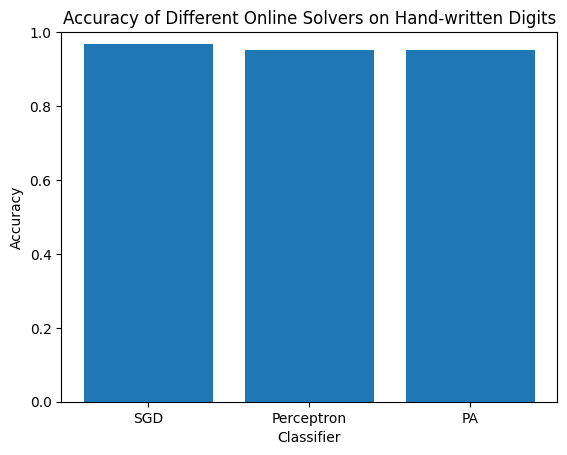

In [2]:
#question 48
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Initialize classifiers with different online solvers
classifiers = {
    "SGD": SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3),
    "Perceptron": Perceptron(tol=1e-3),
    "PA": PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
}

# Train and evaluate each classifier
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot the accuracies
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Online Solvers on Hand-written Digits')
plt.ylim(0.0, 1.0)
plt.show()


In [3]:
#question 49

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [4]:
#question 50
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generate random data for 100 individuals
np.random.seed(0)  # For reproducibility
num_individuals = 100
body_sizes = np.random.uniform(150, 200, num_individuals)  # Random body sizes between 150 and 200
weights = np.random.uniform(50, 100, num_individuals)  # Random weights between 50 and 100
genders = np.random.choice(['Male', 'Female'], num_individuals)  # Random gender tags

# Write data to the text file
with open('person_data.txt', 'w') as file:
    for i in range(num_individuals):
        file.write(f"{body_sizes[i]} {weights[i]} {genders[i]}\n")

# Read the data from the file
with open('person_data.txt', 'r') as file:
    lines = file.readlines()

# Preprocess the data (split by whitespace and remove newline characters)
data = [line.strip().split() for line in lines]

# Extract features (body size and weight) and labels (gender)
X = np.array([[float(person[0]), float(person[1])] for person in data])
y = np.array([person[2] for person in data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict labels for the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.45
